##Loading of Data


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [2]:
df = pd.read_csv("smart_home_energy_consumption_large.csv") 
df

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5
...,...,...,...,...,...,...,...,...
99995,124,Microwave,0.42,09:56,2023-09-28,20.5,Summer,1
99996,184,Computer,0.71,12:48,2023-05-27,-5.4,Spring,2
99997,101,Dishwasher,0.25,05:45,2023-02-18,35.6,Winter,3
99998,423,Air Conditioning,2.69,12:39,2023-04-20,3.7,Spring,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [4]:
df.describe()

,Home ID,Energy Consumption (kWh),Outdoor Temperature (°C),Household Size
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,250.374980,1.499952,14.950135,3.001770
std,144.435367,1.181176,14.438755,1.417077
min,1.000000,0.100000,-10.000000,1.000000
25%,125.000000,0.590000,2.400000,2.000000
50%,250.000000,1.230000,14.900000,3.000000
75%,375.000000,1.870000,27.400000,4.000000
max,500.000000,5.000000,40.000000,5.000000


In [5]:
df.isnull().sum()

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

##Preprocessing

In [7]:
df

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5
...,...,...,...,...,...,...,...,...
99995,124,Microwave,0.42,09:56,2023-09-28,20.5,Summer,1
99996,184,Computer,0.71,12:48,2023-05-27,-5.4,Spring,2
99997,101,Dishwasher,0.25,05:45,2023-02-18,35.6,Winter,3
99998,423,Air Conditioning,2.69,12:39,2023-04-20,3.7,Spring,1


In [8]:
# 3. Feature Engineering
df["Hour"] = pd.to_datetime(df["Time"]).dt.hour
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df.drop(columns=["Home ID", "Time", "Date"], inplace=True)

C:\Users\adars\AppData\Local\Temp\ipykernel_24884\1735111573.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"]).dt.hour


In [9]:
df

,Appliance Type,Energy Consumption (kWh),Outdoor Temperature (°C),Season,Household Size,Hour,Month
0,Fridge,0.20,-1.0,Fall,2,21,12
1,Oven,0.23,31.1,Summer,5,20,8
2,Dishwasher,0.32,21.3,Fall,3,6,11
3,Heater,3.92,-4.2,Winter,1,21,1
4,Microwave,0.44,34.5,Summer,5,4,8
...,...,...,...,...,...,...,...
99995,Microwave,0.42,20.5,Summer,1,9,9
99996,Computer,0.71,-5.4,Spring,2,12,5
99997,Dishwasher,0.25,35.6,Winter,3,5,2
99998,Air Conditioning,2.69,3.7,Spring,1,12,4


In [10]:
X = df.drop("Energy Consumption (kWh)", axis=1)
y = df["Energy Consumption (kWh)"]

In [11]:
categorical_cols = ["Appliance Type", "Season"]
numeric_cols = ["Outdoor Temperature (°C)", "Household Size", "Hour", "Month"]

preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), numeric_cols),
    ("encode", OneHotEncoder(drop='first'), categorical_cols)
])

##Model Training

In [12]:
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['Outdoor Temperature (°C)',
                                                   'Household Size', 'Hour',
                                                   'Month']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first'),
                                                  ['Appliance Type',
                                                   'Season'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [15]:
y_pred = pipeline.predict(X_test)
y_pred

array([0.9944, 1.2153, 2.9993, ..., 0.8026, 0.8067, 1.1696])

In [16]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.7252100517116827
RMSE: 0.3865020961146936
MAE: 0.4976748108690475


In [17]:
pipeline.score(X_train,y_train)

0.9603852846156814

In [18]:
pipeline.score(X_test,y_test)

0.7252100517116827

In [19]:
import joblib
joblib.dump(pipeline, "Smart_Home_RF_model.json")

['Smart_Home_RF_model.json']

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

param_distributions = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [None, 10, 20, 30, 40, 50],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("🔍 Best Params:", random_search.best_params_)
print("✅ Tuned R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
🔍 Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': None, 'model__max_depth': 10}
✅ Tuned R² Score: 0.7567432402387788
RMSE: 0.3421495150293229
MAE: 0.4765618235606401


In [23]:
import joblib
joblib.dump(best_model, "rf_best_model.pkl")


['rf_best_model.pkl']

In [ ]:
#Hence the best model is Random forest after Hypertunning

##Visualization

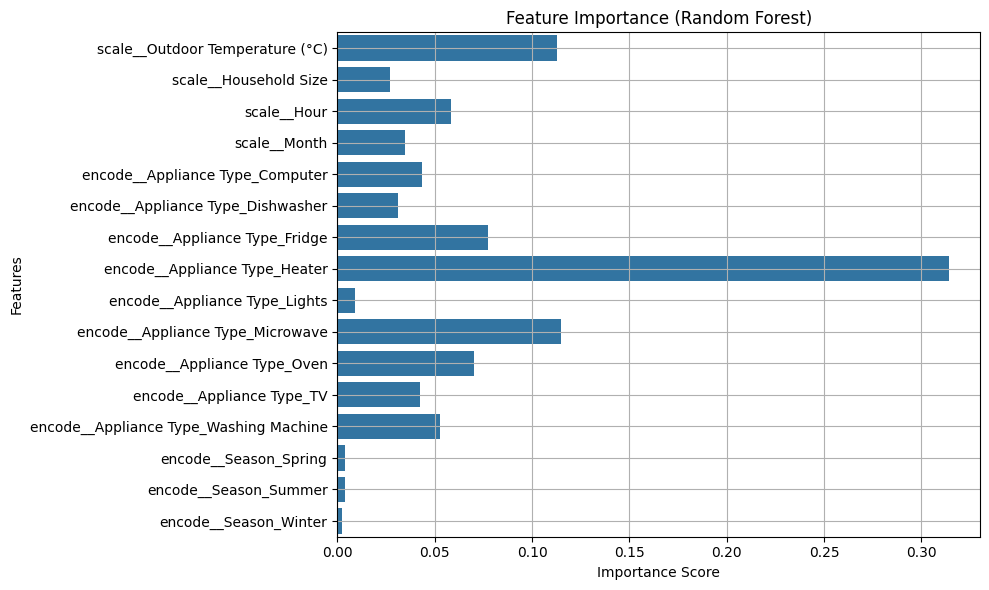

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pipeline.named_steps['model'].feature_importances_


if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    numeric_features = preprocessor.transformers_[0][2]
    categorical_features_transformer = preprocessor.transformers_[1][1]
    categorical_feature_names = categorical_features_transformer.get_feature_names_out(categorical_cols)
    feature_names = list(numeric_features) + list(categorical_feature_names)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)") 
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.grid(True)
plt.show()

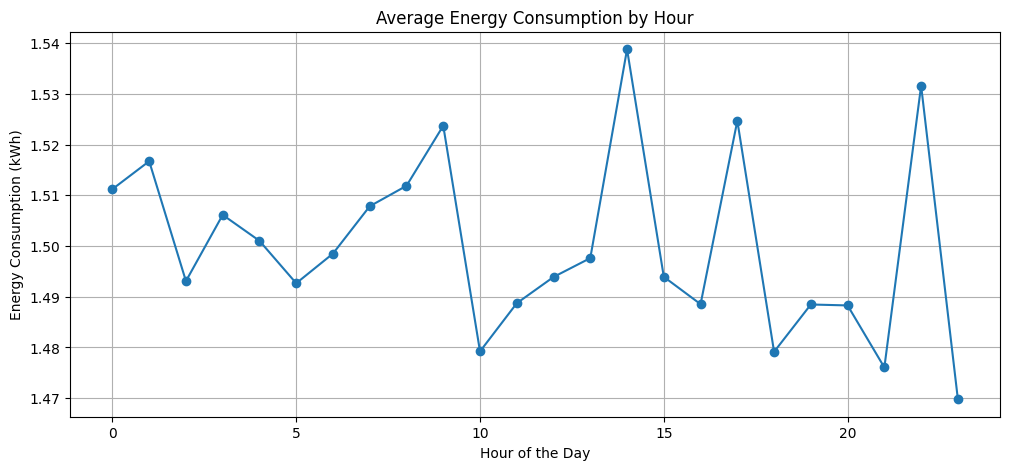

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
df.groupby("Hour")["Energy Consumption (kWh)"].mean().plot(kind='line', marker='o')
plt.title("Average Energy Consumption by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Consumption (kWh)")
plt.grid()
plt.show()

/tmp/ipython-input-115-4101718334.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Appliance Type", y="Energy Consumption (kWh)", data=df, ci=None)


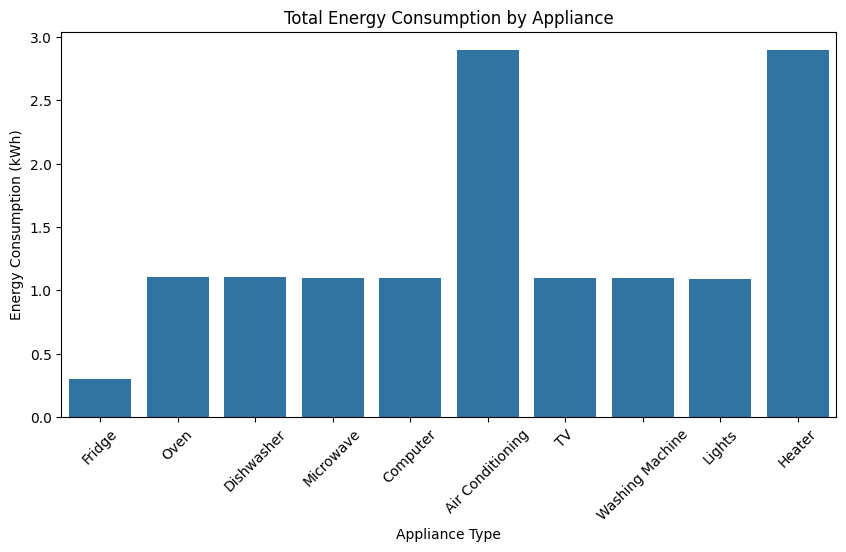

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="Appliance Type", y="Energy Consumption (kWh)", data=df, ci=None)
plt.title("Total Energy Consumption by Appliance")
plt.xticks(rotation=45)
plt.show()

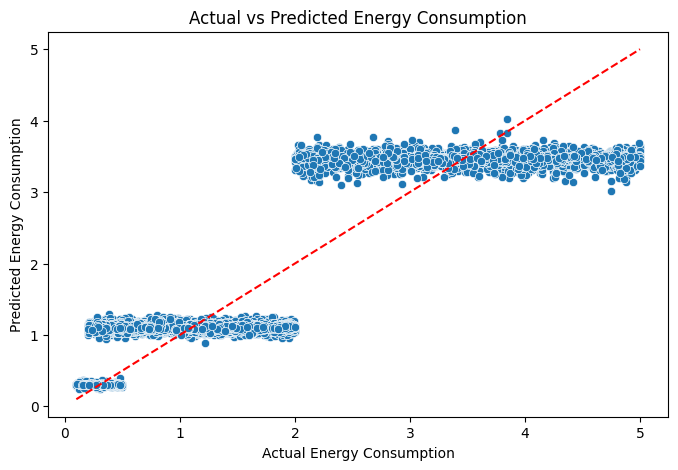

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()

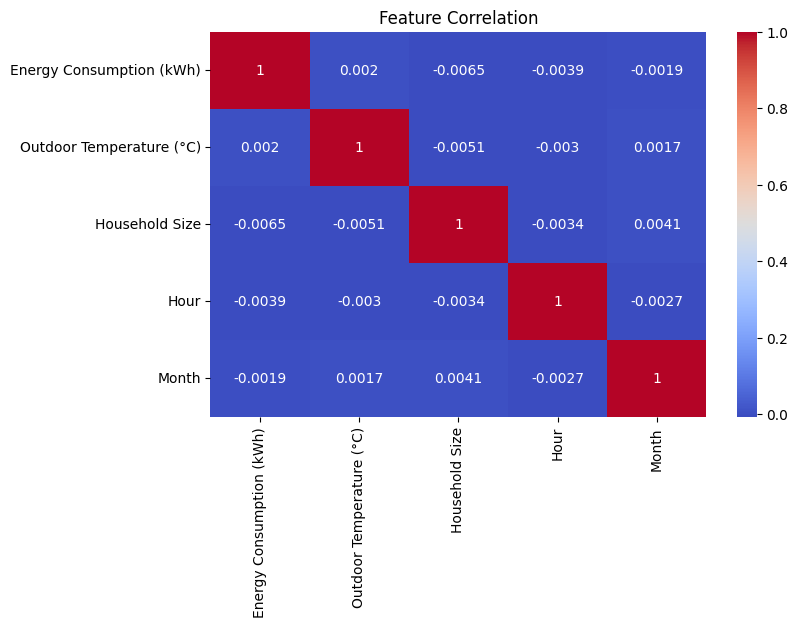

In [ ]:
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()